In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MSDS25_ Class Data (Responses) - Form Responses 1.csv')

In [3]:
df

,Timestamp,phone_type,undergrad_major,num_cups,sleep_hrs,fav_sports,ds_skills,outdoor_hrs,ai_tools_use,ideal_temp,phone_hrs,music_while_studying,music_genre,num_states,fav_season,study_env,summer_desc
0,8/27/2025 10:05:16,Mac,Applied & Computational Mathematics,0,7,Football,7,2,Often,68,3 hours,Yes,Pop,39,Fall,Dorm,Crazy
1,8/27/2025 10:05:19,Mac,Economics,1-2,7,Soccer,6,1,Sometimes,75,5,Yes,EDM/House,20,Summer,Library,Unreal
2,8/27/2025 10:05:19,Mac,Industrial engineering,1 to 2,6,Basketball,6,3 to 4,Always,68,2 to 3,No,Techno,6,Fall,Home,Amazing
3,8/27/2025 10:05:24,Mac,Economics,1,7,Football,3,2,NaN,70,4,Yes,Rock,43,Spring,Outdoors,Interesting
4,8/27/2025 10:05:27,Mac,Biology,5,8,College football,5,3,Sometimes,65,5,Yes,Country/Folk,15,Fall,Library,Fantastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8/27/2025 11:08:37,Mac,Statistics,100mg of caffeine,6,Men’s volleyball,2,0.5,Sometimes,71,4.5,Yes,Jazz-pop,17,Winter,Room or coffee shop,Adventurous
86,8/27/2025 11:08:37,Mac,Biomedical Engineering,1,7,Basketball,7,2,Often,55,2hr 59min,Yes,Country,13,Fall,coffee shop,chaotic
87,8/27/2025 11:08:42,Mac,Commerce,2,7,Basketball,5,4,Always,75,7,No,R&B,18,Summer,Library,Busy
88,8/27/2025 11:08:44,Mac,Applied Statistics,0,7,NaN,5,1,Sometimes,65,8,Yes,All,16,Summer,"quiet, indoors, sunny",Busy


In [5]:
df['phone_type'] = df['phone_type'].replace('Mac', 'iPhone')


In [7]:
df['undergrad_major'].value_counts()

undergrad_major
Statistics                                                     11
Computer Science                                                6
Economics                                                       6
Applied Statistics                                              4
Commerce                                                        3
Computer Science                                                3
Accounting                                                      2
Applied Statistics and Economics                                2
Public Policy                                                   2
Financial Engineering                                           2
Psychology                                                      2
Biology                                                         2
Cognitive Science                                               1
Biomedical Engineering                                          1
Applied computer science                                    

In [ ]:
df['general_area_of_study'] = df['undergrad_major'].copy()

In [169]:
df['general_area_of_study'].value_counts()

general_area_of_study
Math                   22
Commerce               16
Computer Science       13
Engineering            10
Science                 8
Dual Major              6
Policy                  4
Data Science            4
Humanities              4
Systems Engineering     3
Name: count, dtype: int64

In [168]:
df['general_area_of_study'].replace('Chemical Engineering', 'Engineering', inplace=True)

In [103]:
df['undergrad_major'].replace('Computer science ', 'Computer Science', inplace=True)

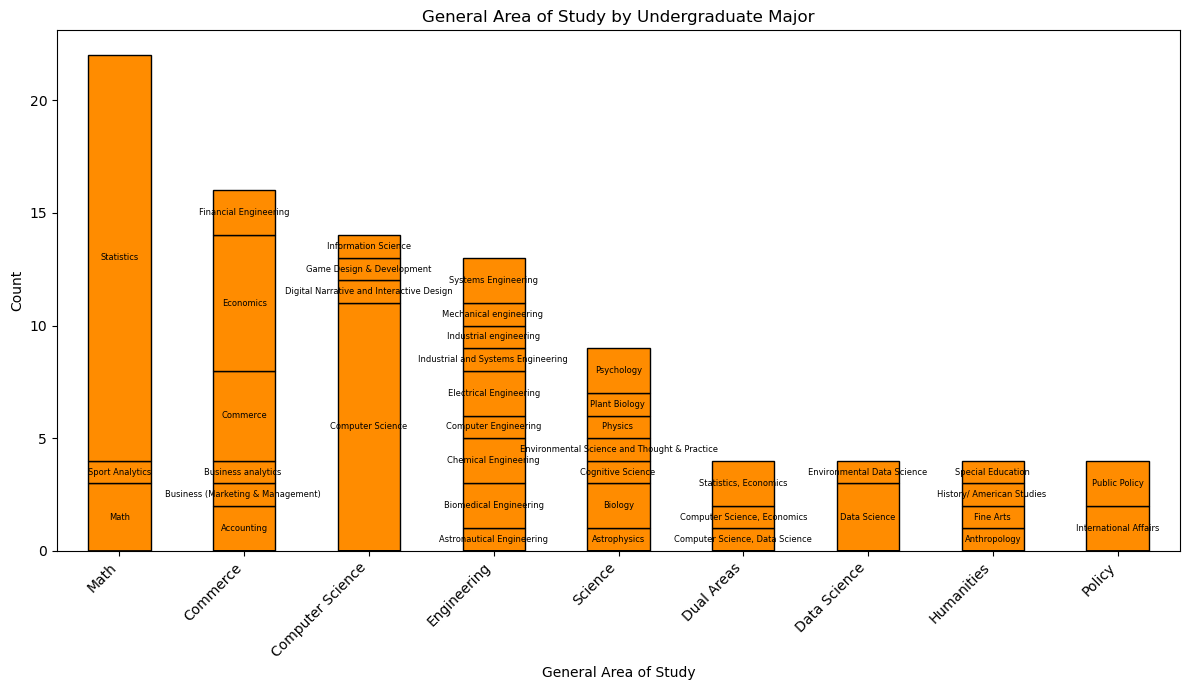

In [280]:
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab
counts = pd.crosstab(df['general_area_of_study'], df['undergrad_major'])

# Sort bars by total height
counts = counts.loc[counts.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar with dark blue color and black edges
ax = counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,7),
    color='darkorange',
    edgecolor='black',   # <-- adds borders
    linewidth=1,
    legend=False
)

# Add labels inside bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, container.get_label(), ha='center', va='center', fontsize=6, color='black')

plt.title("General Area of Study by Undergraduate Major")
plt.xlabel("General Area of Study")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [281]:
df.to_csv('major_cleaned.csv', index=False)

In [264]:
df['undergrad_major'].replace('Applied Statistics, Economics', 'Statistics, Economics', inplace=True)

C:\Users\school\AppData\Local\Temp\ipykernel_47580\337040807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['undergrad_major'].replace('Applied Statistics, Economics', 'Statistics, Economics', inplace=True)


In [271]:
df.loc[
    (df['general_area_of_study'] == "Systems Engineering") & 
    (df['undergrad_major'] == "Industrial and Systems Engineering ") ,
    'general_area_of_study'
] = "Engineering"


In [ ]:
# Find the matching rows
mask = (df['general_area_of_study'] == "Computer Science") & (df['undergrad_major'] == "Computer Science")

# Get the index of the first matching row
idx = df[mask].index[0]

# Update only that one row
df.at[idx, 'undergrad_major'] = "Digital Narrative and Interactive Design"


In [244]:
df.loc[
    (df['undergrad_major'] == "Copmuter Science") &
    (df['general_area_of_study'] == "Computer Science") &
    (df['fav_sports'] == "basketball ") &
    (df['outdoor_hrs'] == ""),
    'undergrad_major'
] = "Digital Narrative and Interactive Design"
